# **1 .데이터 불러오기**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #CSV 파일을 DataFrame 형태로 불러오기
titanic_df=pd.read_csv('/content/drive/MyDrive/AI활용 소프트웨어 개발/7.데이터 분석/data/train.csv')

# **2 기초 EDA**

In [3]:
# 데이터의 전체적인 구조 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 수치형 데이터의 통계 요약 정보
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 데이터의 상위 5개 행을 확인
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 열 이름 확인
print("컬럼 목록:", titanic_df.columns.tolist())

컬럼 목록: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# **3.결측치 탐색 및 처리**

In [7]:
# 각 열의 결측치(Null 또는 NaN) 개수 확인
print("결측치 개수 확인:")
print(titanic_df.isnull().sum())

결측치 개수 확인:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Age 컬럼: 평균값으로 채움
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

/tmp/ipython-input-8-1088421092.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


In [9]:
# Embarked 컬럼: 최빈값으로 채움
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-9-525331097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)


In [10]:
# Cabin 컬럼은 결측치가 너무 많으므로 삭제
titanic_df.drop(columns=['Cabin'], inplace=True)

In [11]:
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# **4. 범주형 변수 분석**

In [12]:
# 분석할 범주형 컬럼 목록
target_cols = ['Sex', 'Embarked', 'Pclass']

# 각 컬럼에 대해 고유값과 빈도수 출력
for col in target_cols:
    print(f"\n [{col}] 컬럼 분석")
    print("고유값:", titanic_df[col].unique())           # 고유값 목록
    print("빈도수:\n", titanic_df[col].value_counts())   # 고유값별 개수



 [Sex] 컬럼 분석
고유값: ['male' 'female']
빈도수:
 Sex
male      577
female    314
Name: count, dtype: int64

 [Embarked] 컬럼 분석
고유값: ['S' 'C' 'Q']
빈도수:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

 [Pclass] 컬럼 분석
고유값: [3 1 2]
빈도수:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


# **5.데이터 시각화**

In [13]:
!apt-get -qq -y install fonts-nanum

In [14]:
import matplotlib as mpl

In [15]:
#런타임에 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [17]:
import os
import shutil

In [19]:
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

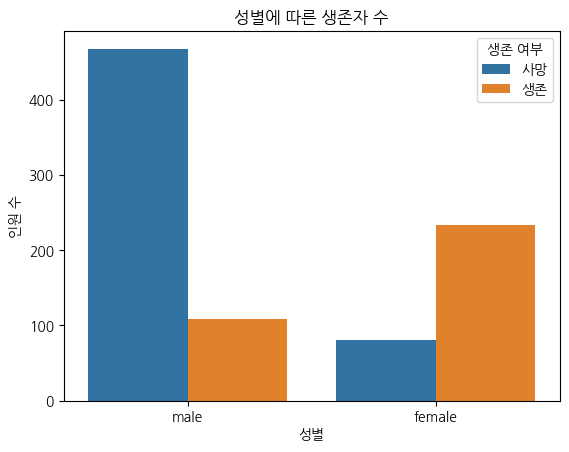

In [23]:
# 데이터프레임: titanic_df 사용

# 'Sex' 컬럼(성별)을 x축으로, 'Survived'(생존 여부)를 색상 구분(hue)으로 지정
sns.countplot(data=titanic_df, x='Sex', hue='Survived')
plt.title("성별에 따른 생존자 수")
plt.xlabel("성별")
plt.ylabel("인원 수")
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.show()

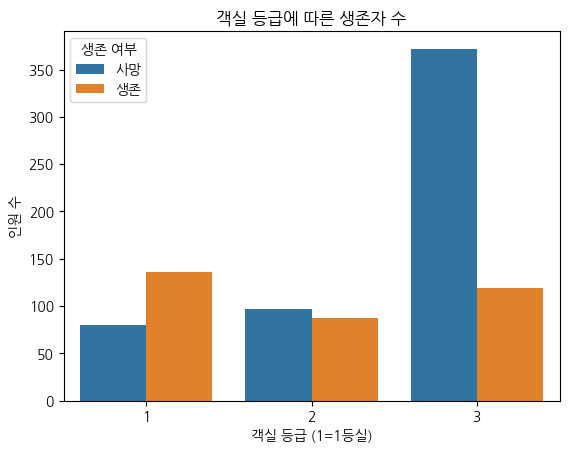

In [25]:
# 객실 등급(Pclass)에 따른 생존자 수를 막대그래프로 시각화
# 'Pclass'는 객실 등급을 나타내며, 1=1등실, 2=2등실, 3=3등실

# x축에 객실 등급(Pclass), 색상(hue)으로 생존 여부(Survived)를 구분하여 막대그래프 생성
sns.countplot(data=titanic_df, x='Pclass', hue='Survived')
plt.title("객실 등급에 따른 생존자 수")
plt.xlabel("객실 등급 (1=1등실)")
plt.ylabel("인원 수")
plt.legend(title='생존 여부', labels=['사망', '생존'])
plt.show()

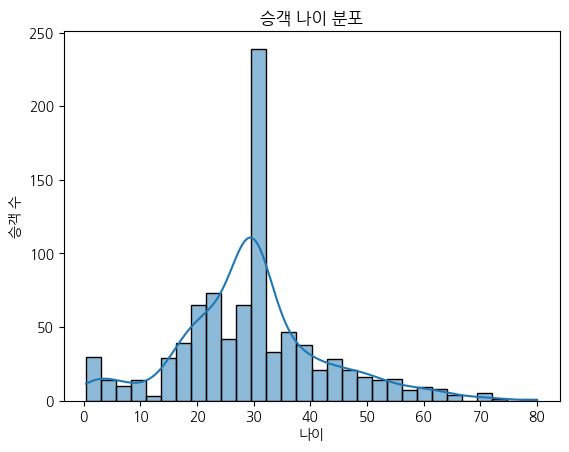

In [27]:
# 승객의 나이 분포를 히스토그램으로 시각화
# 나이가 어느 범위에 많이 분포되어 있는지 확인할 수 있음

sns.histplot(data=titanic_df, x='Age', bins=30, kde=True)
plt.title("승객 나이 분포")
plt.xlabel("나이")
plt.ylabel("승객 수")
plt.show()

# **6.인코딩**

In [28]:
# 성별: male → 0, female → 1
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Embarked: S=0, C=1, Q=2로 변환
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# **7.전처리된 데이터 저장**

In [29]:
# 전처리된 데이터를 새 파일로 저장
titanic_df.to_csv('titanic_processed.csv', index=False)

print("✅ 전처리 완료! 'titanic_processed.csv'로 저장되었습니다.")


✅ 전처리 완료! 'titanic_processed.csv'로 저장되었습니다.
